In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import statistics

In [33]:
N = 200
spins = np.random.choice([-1,1], size=[N,N])
betaJ = 0.8

In [13]:
class Ising2D:
    def __init__(self, N, BETA):
        self.N = N
        self.beta  = BETA
        self.spins = np.random.choice([-1,1], size = [N,N])
    
    def oneStep(self):
        for i in range(self.N**2):
            x,y = random.choices(range(self.N),k=2)
            self.updateSpins(x, y)

    def calcEnergy(self, x, y):
        
        xLeft = self.N-1 if x==0 else -1
        xRight = -(self.N-1) if x==self.N-1 else 1
        yAbove = self.N-1 if y==0 else -1
        yBelow = -(self.N-1) if y==self.N-1 else 1

        kernel_x = np.array([xLeft, 0, xRight,
                             xLeft,    xRight,
                             xLeft, 0, xRight])
                            
        kernel_y = np.array([yAbove, yAbove, yAbove,
                                  0,              0,
                             yBelow, yBelow, yBelow])

        neighbours = self.spins[ x + kernel_x, y + kernel_y]
        dEnergy = 2 * self.spins[x, y] * sum(neighbours)
        return dEnergy

    def updateSpins(self, x, y):
        dEnergy = self.calcEnergy(x, y)
        if dEnergy <= 0:
            self.spins[x,y] *= -1 #certrainly flip a spin

        elif random.random() > math.exp(-self.beta * dEnergy):
            self.spins[x,y] *= -1

In [87]:
%timeit a.oneStep()

9.09 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
a = Ising2D(100, 0.8)
spins_pics = []
for i in range(30):
    spins_pics.append(a.spins)
    #a.oneStep()

In [71]:
%timeit random.choice()
%timeit np.random.random()

95.6 ns ± 2.32 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
462 ns ± 18.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
import time
times = {}
for N in range(10,200,10):
    a = Ising2D(N, 0.4)
    temp_time = []
    for _ in range(7):
        time1 = time.time()
        a.oneStep()
        temp_time.append(time.time()-time1)
    times[N] = temp_time

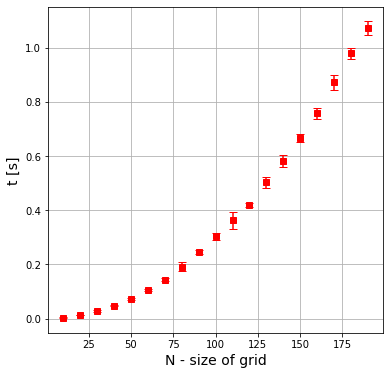

In [16]:
plt.figure(figsize=[6,6])
plt.errorbar(times.keys(), np.array(list(times.values())).mean(axis=1), yerr = np.array(list(times.values())).std(axis=1), capsize=4, marker="s", ls = "", color ="red")
plt.xlabel("N - size of grid", size=14)
plt.ylabel("t [s]",size=14)

plt.grid()

In [12]:
qq = np.random.random(size=[200,200])
%timeit np.mean(qq)
%timeit qq.flatten()

37.4 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
20.4 µs ± 684 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


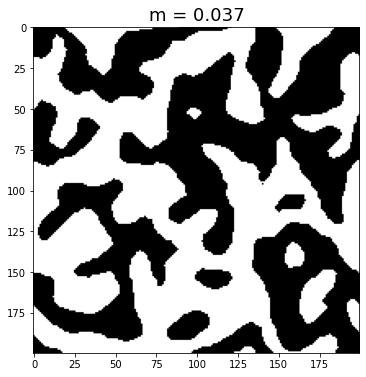

In [37]:
from simulate_2dGrid import *
a = Ising2D(200, -1)
fig, ax = plt.subplots(figsize=[8,6])

for i in range(300):
    a.oneStep(), 
    anim_grid(i, a, ax), 
    plt.savefig("pics/img%03d.png"%i)

In [41]:
ising_net

NameError: name 'ising_net' is not defined